# Question 1

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
import cv2
import scipy as sp
import os
from matplotlib import pyplot as plt
from matplotlib import animation
from JSAnimation import IPython_display
import sklearn
from sklearn import decomposition
from sklearn import datasets
from sklearn import linear_model
import re
import collections

In [7]:
# Define functions to reorder class files, using RE module
def tryint(s):
    try:
        return int(s)
    except:
        return s

def alphanum_key(s):
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def sort_nicely(l):
    l.sort(key=alphanum_key)

In [8]:
# Read training data
path = 'C:/Users/samya/Documents/HW2_submission/HW2_submission/Problem/Data/Train'

all_files = os.listdir(path)   # imagine you're one directory above test dir
txt_files = filter(lambda x: x[-4:] == '.txt', all_files)
txt_files =[files for files in txt_files]
sort_nicely(txt_files)

len_Class = []
i_Vec = []
for file in txt_files:
    src = os.path.join(path, file)

    file = open(src, 'r')
    contents = file.read()
    i_VecTemp = contents.splitlines()
    len_Class.append(len(i_VecTemp))
    file.close()
    for i in i_VecTemp:
        temp = i.split()
        i_Vec.append(temp)
    
i_Vec = np.transpose(np.array(i_Vec))
i_Vec = i_Vec.astype(dtype = 'float32')

In [9]:
txt_files

['Class_1.txt',
 'Class_2.txt',
 'Class_3.txt',
 'Class_4.txt',
 'Class_5.txt',
 'Class_6.txt',
 'Class_7.txt',
 'Class_8.txt',
 'Class_9.txt',
 'Class_10.txt',
 'Class_11.txt',
 'Class_12.txt',
 'Class_13.txt',
 'Class_14.txt',
 'Class_15.txt',
 'Class_16.txt',
 'Class_17.txt',
 'Class_18.txt',
 'Class_19.txt',
 'Class_20.txt',
 'Class_21.txt',
 'Class_22.txt',
 'Class_23.txt',
 'Class_24.txt']

In [10]:
# Lengths of the various classes 
len_Class

[1572,
 1708,
 100,
 7326,
 55,
 100,
 800,
 633,
 359,
 960,
 680,
 100,
 1820,
 800,
 100,
 100,
 1174,
 100,
 1425,
 80,
 681,
 747,
 249,
 822]

In [11]:
len_ClassSum = np.cumsum(len_Class)
len_ClassSum

array([ 1572,  3280,  3380, 10706, 10761, 10861, 11661, 12294, 12653,
       13613, 14293, 14393, 16213, 17013, 17113, 17213, 18387, 18487,
       19912, 19992, 20673, 21420, 21669, 22491], dtype=int32)

In [12]:
d1, d2 = i_Vec.shape
print(i_Vec.shape)

(600, 22491)


In [13]:
# Normalize the i vectors
i_VecN = np.sqrt(np.sum(np.square(i_Vec), axis = 0))
i_VecNorm = i_Vec/i_VecN[np.newaxis, :]

In [14]:
# Calculate global mean
global_Mean = np.mean(i_VecNorm, axis = 1)

# Calculate local means
local_Mean = np.zeros(shape = (d1, len(len_Class)))
for i in range(0, len(len_Class)):
    temp_1 = np.mean(i_VecNorm[:, len_ClassSum[i] - len_Class[i]:len_ClassSum[i]], axis = 1)
    local_Mean[:,i] = temp_1

In [15]:
global_Mean.shape

(600,)

In [16]:
# Calculate Intra-Class Scatter
intra_Class = np.zeros(shape = (d1, d1))

for i in range(0, len(len_Class)):
    temp_iVec = i_VecNorm[:, len_ClassSum[i] - len_Class[i]:len_ClassSum[i]] - local_Mean[:, i][:, np.newaxis]
    temp = np.matmul(temp_iVec, np.transpose(temp_iVec))
    intra_Class = intra_Class + temp

In [17]:
intra_Class.shape

(600, 600)

In [18]:
# Calculate Inter-Class Scatter 
inter_Class = np.zeros(shape = (d1, d1))

for i in range(len(len_Class)):
    temp_iVec = local_Mean[:,i][:, np.newaxis] - global_Mean[:, np.newaxis]
    temp = np.matmul(i_Vec, np.transpose(i_Vec))
    temp = len_Class[i]*temp
    inter_Class = inter_Class + temp

In [19]:
inter_Class.shape

(600, 600)

In [20]:
# Solving Generalized eigenvector problem
V,D = sp.sparse.linalg.eigs(inter_Class, k = 23, M = intra_Class)
V = np.real(V)

<Container object of 23 artists>

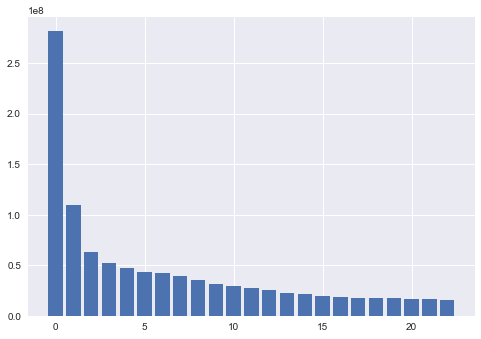

In [21]:
xi = [i for i in range(len(V))]
plt.bar(xi, V)

In [22]:
D.shape

(600, 23)

In [23]:
#Projecting i-vectors onto the LDA matrix space
proj_iVec = np.matmul(np.transpose(D), i_VecNorm)
proj_iVec = np.real(proj_iVec)
proj_iVec.shape

(23, 22491)

In [24]:
# Length normalize projected eigenvectors
proj_iVecNorm = proj_iVec/(np.sqrt(np.sum(np.square(proj_iVec), axis = 0)))[np.newaxis, :]

In [25]:
# Compute local means again
local_MeanProj = np.zeros(shape = (len(len_Class) - 1, len(len_Class)))
for i in range(0, len(len_Class)):
    temp_1 = np.mean(proj_iVec[:, len_ClassSum[i] - len_Class[i]:len_ClassSum[i]], axis = 1)
    local_MeanProj[:,i] = temp_1

In [26]:
local_MeanProj.shape

(23, 24)

In [27]:
# Normalize the local means
local_MeanProjNorm = local_MeanProj/(np.sqrt(np.sum(np.square(local_MeanProj), axis = 0)))[np.newaxis, :]

## Classifier Testing

In [28]:
# Import the data from test folder
path = 'C:/Users/samya/Documents/HW2_submission/HW2_submission/Problem/Data/Eval'

all_files = os.listdir(path)   # imagine you're one directory above test dir
txt_files = filter(lambda x: x[-4:] == '.txt', all_files)
txt_files =[files for files in txt_files]
sort_nicely(txt_files)

len_ClassEval = []
i_VecEval = []
for file in txt_files:
    src = os.path.join(path, file)

    file = open(src, 'r')
    contents = file.read()
    i_VecTemp = contents.splitlines()
    len_ClassEval.append(len(i_VecTemp))
    file.close()
    for i in i_VecTemp:
        temp = i.split()
        i_VecEval.append(temp)
    
i_VecEval = np.transpose(np.array(i_VecEval))
i_VecEval = i_VecEval.astype(dtype = 'float32')

In [29]:
len_ClassEvalSum = np.cumsum(len_ClassEval)
len_ClassEvalSum

array([ 100,  200,  300,  400,  500,  600,  700,  800,  900, 1000, 1100,
       1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200,
       2300, 2400], dtype=int32)

In [30]:
i_VecEval.shape

(600, 2400)

In [31]:
# Project onto LDA subspace and normalize
proj_iVecEval = np.matmul(np.transpose(D), i_VecEval)
proj_iVecEvalNorm = proj_iVecEval/(np.sqrt(np.sum(np.square(proj_iVecEval), axis = 0)))[np.newaxis, :]

In [32]:
proj_iVecEvalNorm.shape

(23, 2400)

In [33]:
# Calculate scores of all ivectors
scores_Eval = np.transpose(np.matmul(np.transpose(proj_iVecEvalNorm), local_MeanProjNorm))
scores_Eval.shape

(24, 2400)

In [34]:
true_Class = []
for i in range(len(len_ClassSum)):
    c = collections.Counter(scores_Eval[:, len_ClassEvalSum[i] - len_ClassEval[i]:len_ClassEvalSum[i]].argmax(0))
    true_Class.append(c[i])
    
true_Class

[84,
 63,
 80,
 86,
 72,
 23,
 85,
 98,
 52,
 88,
 53,
 75,
 99,
 54,
 75,
 53,
 99,
 46,
 95,
 60,
 32,
 90,
 8,
 38]

In [35]:
# Calculating total correct classification
(np.sum(true_Class)/len_ClassEvalSum[-1])*100

67.0

In [36]:
def LDA_iVec(path):
    all_files = os.listdir(path)   # imagine you're one directory above test dir
    txt_files = filter(lambda x: x[-4:] == '.txt', all_files)
    txt_files =[files for files in txt_files]
    sort_nicely(txt_files)

    len_ClassEval = []
    i_VecEval = []
    for file in txt_files:
        src = os.path.join(path, file)

        file = open(src, 'r')
        contents = file.read()
        i_VecTemp = contents.splitlines()
        len_ClassEval.append(len(i_VecTemp))
        file.close()
        for i in i_VecTemp:
            temp = i.split()
            i_VecEval.append(temp)

    i_VecEval = np.transpose(np.array(i_VecEval))
    i_VecEval = i_VecEval.astype(dtype = 'float32')
    
    len_ClassEvalSum = np.cumsum(len_ClassEval)
    
    proj_iVecEval = np.matmul(np.transpose(D), i_VecEval)
    proj_iVecEvalNorm = proj_iVecEval/(np.sqrt(np.sum(np.square(proj_iVecEval), axis = 0)))[np.newaxis, :]
    
    scores_Eval = np.transpose(np.matmul(np.transpose(proj_iVecEvalNorm), local_MeanProjNorm))
    
    true_Class = []
    for i in range(len(len_ClassSum)):
        c = collections.Counter(scores_Eval[:, len_ClassEvalSum[i] - len_ClassEval[i]:len_ClassEvalSum[i]].argmax(0))
        true_Class.append(c[i])
    
    return (np.sum(true_Class)/len_ClassEvalSum[-1])*100

In [37]:
LDA_iVec('C:/Users/samya/Documents/HW2_submission/HW2_submission/Problem/Data/Eval')

67.0

In [38]:
LDA_iVec('C:/Users/samya/Documents/HW2_submission/HW2_submission/Problem/Data/Dev')

80.208333333333343

# Question 2

In [39]:
# Load Training Data into large Matrix as before
path = 'C:/Users/samya/Documents/HW2_submission/HW2_submission/Problem/Data/Train'

all_files = os.listdir(path)   # imagine you're one directory above test dir
txt_files = filter(lambda x: x[-4:] == '.txt', all_files)
txt_files =[files for files in txt_files]
sort_nicely(txt_files)

len_Class = []
i_Vec = []
for file in txt_files:
    src = os.path.join(path, file)

    file = open(src, 'r')
    contents = file.read()
    i_VecTemp = contents.splitlines()
    len_Class.append(len(i_VecTemp))
    file.close()
    for i in i_VecTemp:
        temp = i.split()
        i_Vec.append(temp)
    
i_Vec = np.transpose(np.array(i_Vec))
i_Vec = i_Vec.astype(dtype = 'float32')

In [42]:
i_Vec.shape

(600, 22491)

In [84]:
d1, d2 = i_VecEval.shape

In [ ]:
clf = linear_model.Lasso(alpha = 0.1)

w_Lasso = []
for i in range(d2):
    clf.fit(i_Vec, i_VecEval[:,i])
    w_Lasso.append(clf.coef_)


[array([ 0., -0., -0., ..., -0.,  0.,  0.], dtype=float32)]